Holdout method is a model evaluation technique where the dataset is split into two subsets: a training set and a validation set. The advantages of the holdout method are its simplicity and speed. However, it may result in high variance due to the dependency on a single validation set and may not effectively capture the model's performance on unseen data.

Model evaluation with validation involves splitting the dataset into three subsets: a training set, a validation set, and a test set. The training set is used to train the model, the validation set is used to tune hyperparameters and assess model performance, and the test set is used for final evaluation. The advantages of this approach include better estimation of model performance on unseen data, the ability to fine-tune hyperparameters, and reduced risk of overfitting. However, it requires a larger dataset, adds additional computational complexity, and may introduce bias if the validation set is not representative of the overall data distribution. It strikes a balance between simplicity and accuracy compared to other evaluation techniques like cross-validation.



Kewan Sulaiman Saleh

In [296]:
#This Code belongs to Kewan S. Saleh
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from sklearn.preprocessing import LabelEncoder

In [297]:

stroke_df = pd.read_csv('stroke-data.csv')

#Remove Duplicates
stroke_df = stroke_df.drop_duplicates()



In [298]:
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


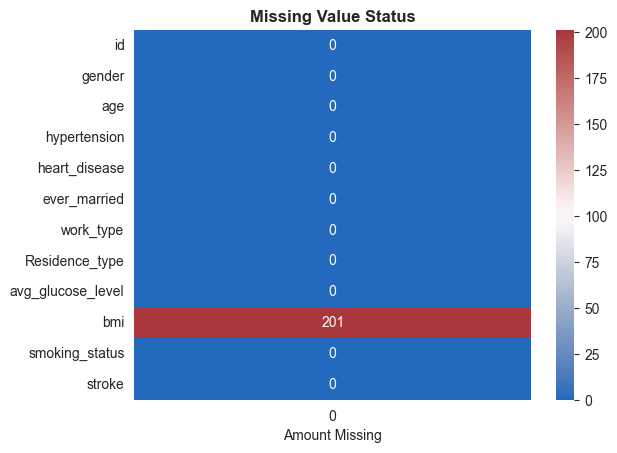

In [299]:
##Visualize Missing Values 
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(stroke_df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [300]:
fig = ex.pie(stroke_df,names='stroke')
fig.update_layout(title='<b>Proportion Of Stroke Samples<b>')
fig.show()

In [301]:
stroke_population = stroke_df.query('stroke ==1').copy()
fig = ex.pie(stroke_population,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Different Smoking Categories Among Stroke Population<b>')
fig.show()

In [302]:
#Transform Categorical to Numerical
stroke_df
d_list = stroke_df.select_dtypes(include = ['object']).columns.tolist()
le = LabelEncoder()
for i in d_list:
    le.fit(stroke_df[i])
    stroke_df[i] = le.transform(stroke_df[i])
stroke_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [303]:
#Replacing Missing values
stroke_df = stroke_df.fillna('0')
#stroke_df.info()

In [304]:
X = stroke_df.drop("stroke", axis=1)
y = stroke_df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34,train_size=0.66, random_state=0)
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [305]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the decision tree classifier 
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()

# Calculate true positives, false positives, and false negatives
tp = ((y_pred == 1) & (y_test == 1)).sum()
tn = ((y_pred == 0) & (y_test == 0)).sum()
fp = ((y_pred == 1) & (y_test == 0)).sum()
fn = ((y_pred == 0) & (y_test == 1)).sum()



# Calculate precision
precision = tp / (tp + fp)

if (tp + fp) > 0:
    precision = tp / (tp + fp)
else:
    precision = 0


# Calculate recall
recall = tp / (tp + fn)

# Calculate F1-score

f1_score = 2 * (precision * recall) / (precision + recall)

if (tp + fp) > 0:
    f1_score = tp / (tp + fp)
else:
    f1_score = 0


print("Accuracy:", round(accuracy*100,2),'%')
print("Precision:", round(precision*100,2),'%')
print("Recall:", round(recall*100,2),'%')
print("F1-score:", round(f1_score*100,2),'%')

Accuracy: 92.46 %
Precision: 13.89 %
Recall: 12.66 %
F1-score: 13.89 %


Results: The result of 3 fold validation reliable than hold-out, because iterate the training and testing three times, the place of test and train changed 3 times.

In [309]:
# Perform 3-fold cross-validation and obtain predicted labels

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predicted = cross_val_predict(clf, X, y, cv=3)

# Calculate the confusion matrix for each fold
confusion_matrices = []
accuracy=[]
precision=[]
recall=[]
f1_score=[]
for fold in range(3):
    cm = confusion_matrix(y, predicted)
    confusion_matrices.append(cm)

# Calculate TP, TN, FP, FN for each fold
for fold, cm in enumerate(confusion_matrices):
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    ac=(tp+tn)/(tp+tn+fn+fp)
    accuracy.append(ac)
    precision.append(tp / (tp + fp))
    recall.append( tp / (tp + fn))
    p=(tp / (tp + fp))
    r=tp / (tp + fn)
    score=2 * (p * r) / (p + r)
    f1_score.append(score)     

print("Accuracy:", round(np.mean(accuracy)*100,2),'%')
print("Precision:", round(np.mean(precision)*100,2),'%')
print("Recall:", round(np.mean(recall)*100,2),'%')
print("F1-score:", round(np.mean(f1_score)*100,2),'%')


Accuracy: 90.96 %
Precision: 14.85 %
Recall: 18.07 %
F1-score: 16.3 %


Results: The result of 5 fold validation reliable than hold-out, because iterate the training and testing five times, the place of test and train changed 5 times, the test set change the palce in the dataset five times with diffrent data.

In [312]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import numpy as np


clf2 = DecisionTreeClassifier(random_state=10)

predicted = cross_val_predict(clf2, X, y, cv=3)

# Calculate the confusion matrix for each fold
confusion_matrices = []
accuracy = []
precision = []
recall = []
f1_score = []
for fold in range(3):
    cm = confusion_matrix(y, predicted)
    confusion_matrices.append(cm)

# Calculate TP, TN, FP, FN for each fold
for fold, cm in enumerate(confusion_matrices):
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    ac = (tp + tn) / (tp + tn + fn + fp)
    accuracy.append(ac)
    precision.append(tp / (tp + fp))
    recall.append(tp / (tp + fn))
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    score = 2 * (p * r) / (p + r)
    f1_score.append(score)

print("Accuracy:", round(np.mean(accuracy)*100,2),'%')
print("Precision:", round(np.mean(precision)*100,2),'%')
print("Recall:", round(np.mean(recall)*100,2),'%')
print("F1-score:", round(np.mean(f1_score)*100,2),'%')


Accuracy: 90.96 %
Precision: 14.85 %
Recall: 18.07 %
F1-score: 16.3 %


Note:

Depend On Time the cross validations give more reliability over hold-out validation

Two common ways to improve the decision tree algorithm are:

1-Pruning: Pruning is a technique used to prevent overfitting and improve the generalization capability of decision trees. 

2-Ensemble Methods: Ensemble methods combine multiple decision trees to make predictions, leveraging the collective wisdom of the models. such as RandomForest




In [322]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the decision tree classifier with pre-pruning
clf4 = DecisionTreeClassifier(random_state=10,max_depth=16)
clf4.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf4.predict(X_test)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()

cm = confusion_matrix(y_test, y_pred)

# Calculate true positives, false positives, and false negatives
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]
# Calculate precision
precision = tp / (tp + fp)
# Calculate recall
recall = tp / (tp + fn)
# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", round(accuracy*100,2),'%')
print("Precision:", round(precision*100,2),'%')
print("Recall:", round(recall*100,2),'%')
print("F1-score:", round(f1_score*100,2),'%')

Accuracy: 92.81 %
Precision: 18.06 %
Recall: 16.46 %
F1-score: 17.22 %


As a Result after performing pre-prunng overal performance improved